In [4]:
# Importing modules
import matplotlib.pyplot as plot;
import numpy as np;

In [5]:
# Newton Raphson method
def NewtonRaphson(f, df, z0, maxIter, rootRange):
    z = z0;
    for i in range(maxIter):
        deriv = df(z);
        if (deriv == 0): deriv = rootRange;
        if (abs(f(z).real) <= rootRange): return z;
        
        z -= f(z) / deriv; 
        
    return None; # No root was found.

In [6]:
# Defining functions
def f(z): return z ** 5 - 1;
def df(z): return 5 * z ** 4;

### Finding individual roots.

In [7]:
# Searching for roots of a function inside a range.
def RootSearch(f, df, start, end, numValues, maxIter, rootToler):
    complexSpace = np.linspace(start, end, numValues);
    xValues, yValues = complexSpace, complexSpace * 1j;

    rootsFound = [];
    for x in xValues:
        for y in yValues: 
            NR = NewtonRaphson(f, df, x + y, maxIter, rootToler);
            if (not NR or NR < start or NR > end): continue; 
            
            rootsFound.append(NR); 

    return np.unique( np.round(rootsFound, int(abs(np.log10(rootToler)) / 2)) );

In [8]:
start, end = -10, 10;
maxIterations, rootRange = 40, 1e-8;

# Searching for roots
roots = RootSearch(f, df, start, end, 100, maxIterations, rootRange);
print(roots);

[-0.809-0.5878j -0.809+0.5878j  0.309-0.9511j  0.309+0.9511j
  1.   -0.j    ]


### Generating Basins of Attraction of a function.

In [13]:
# Getting map of roots found based on x and y values. 
def RootMapping(f, df, start, end, maxIter, rootToler, numValues):
    complexSpace = np.linspace(start, end, numValues).real;
    xValues, yValues = complexSpace, complexSpace * 1j;
    
    rootsFound = [];
    complexPoints = [];
    for x in xValues:
        for y in yValues:
            cPoint = x + y;
            NR = NewtonRaphson(f, df, cPoint, maxIter, rootToler);
            if (not NR or NR < start or NR > end): continue; 
            
            rootsFound.append(NR); 
            complexPoints.append(cPoint);

    return ( np.array(complexPoints), np.round(rootsFound, 3) ); 

In [16]:
def Plot(f, df, start, end, maxIterations, rootRange, numPoints):
    rootMap = RootMapping(f, df, start, end, maxIterations, rootRange, numPoints);
    roots = np.unique( rootMap[1] );
    
    # Setting respective root colors
    colorMap = rootMap[1];
    for i, root in enumerate(roots):
        colorMap = np.where((colorMap.real == root.real) & (colorMap.imag == root.imag), i / roots.size, colorMap);

    # Plotting the bacins of attraction
    plot.figure(figsize=(6, 6));
    
    plot.scatter(rootMap[0].real, rootMap[0].imag, c = colorMap, marker = '.');
    plot.ylabel("y (Imaginary)");
    plot.xlabel("x (Real)");

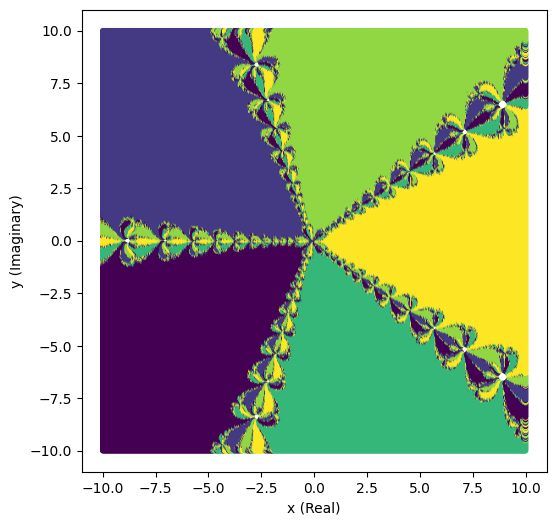

In [21]:
Plot(f, df, start, end, maxIterations, rootRange, 500);